In [23]:
import pandas as pd
data = pd.read_csv("df_combine.csv")
data["date"] = pd.to_datetime(data["date"] )
data.set_index('date', inplace=True)

In [24]:
df_dtypes = pd.DataFrame(data.dtypes)
df_dtypes.reset_index(drop=False,inplace=True)
df_dtypes.rename(columns={"index":"colnames",0:"type"},inplace=True)

In [32]:
col_select = list(df_dtypes.loc[df_dtypes["type"]!="object","colnames"])
data = data[col_select] 


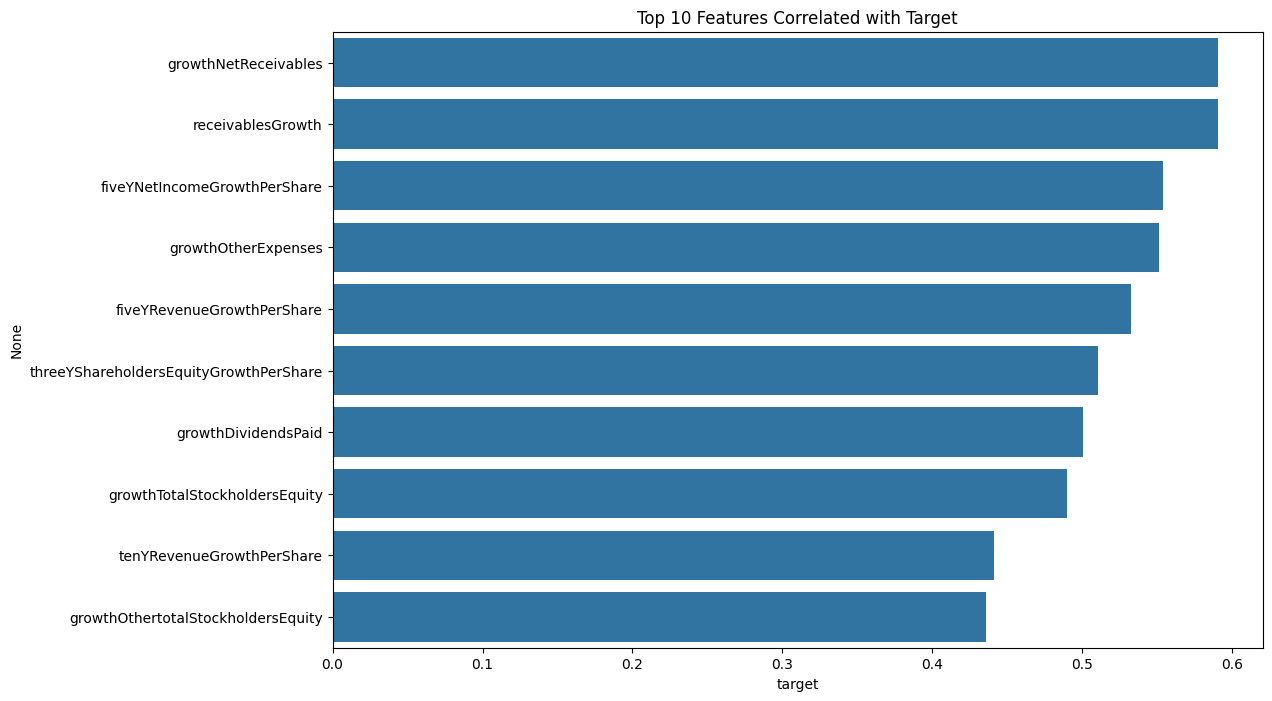

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算與目標變數的相關性
correlation_matrix = data.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# 選擇與目標變數相關性最高的前15個變數
top_features = target_correlation.index[1:11]

# 可視化相關性
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation[top_features], y=top_features)
plt.title('Top 10 Features Correlated with Target')
plt.show()


In [48]:
data.dropna(inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 選擇相關性高的變數
selected_features = top_features

# 設定目標變數和解釋變數
X = data[selected_features]
y = data['target']

# 分割訓練和測試數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵變數
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       111
           1       0.67      0.95      0.78        19

    accuracy                           0.92       130
   macro avg       0.83      0.93      0.87       130
weighted avg       0.94      0.92      0.93       130



d:\0605interview\0605ineterview\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
